In [1]:
import logging
from functools import partial

In [2]:
import numpy as np
import z2pack

In [3]:
logging.getLogger('z2pack').setLevel(logging.WARNING)

In [4]:
def ham(k, v, w):
    kval, = k 
    c = v + np.conjugate(w) * np.exp(-1j * kval * 2 * np.pi)
    return np.array([[0, c], [np.conjugate(c), 0]])

In [5]:
syst1 = z2pack.hm.System(
    partial(ham, v=0.5, w=0),
    dim=1
)

In [6]:
res1 = z2pack.line.run(system=syst1, line=lambda t: [t])

In [7]:
res1.wcc

[0.0]

In [8]:
syst2 = z2pack.hm.System(
    partial(ham, v=0.5, w=1),
    dim=1
)

In [9]:
res2 = z2pack.line.run(system=syst2, line=lambda t: [t])

In [10]:
res2.wcc

[0.5]

In [11]:
def get_phase(vw):
    v, w = vw
    system = z2pack.hm.System(    partial(ham, v=v, w=w),
    dim=1)
    res = z2pack.line.run(system=system, line=lambda t: [t])
    wcc, = res.wcc
    if np.isclose(wcc, 0) or np.isclose(wcc, 1):
        return 0
    if np.isclose(wcc, 0.5):
        return 1
    return -1

For this part, the `phasemap` and `nest-asyncio` libraries are needed.

In [12]:
import nest_asyncio
nest_asyncio.apply()

In [13]:
import phasemap

In [14]:
res =  phasemap.run(fct=get_phase, limits=[(-1, 1), (-1, 1)])

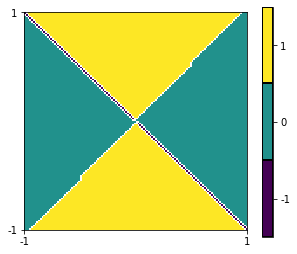

In [15]:
phasemap.plot.boxes(res);